# Predicting Star, Galaxy and Quasar using SVM and Naive Bayes

In [1]:
# import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Data Acquistion

In [2]:
#load dataset
df=pd.read_csv('SVMProject.csv')

In [3]:
#read the data
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.240000e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752.0,301.0,4,267,3.720000e+18,STAR,-0.000009,3306,54922,491
1,1.240000e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752.0,301.0,4,267,3.640000e+17,STAR,-0.000055,323,51615,541
2,1.240000e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752.0,301.0,4,268,3.230000e+17,GALAXY,0.123111,287,52023,513
3,1.240000e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752.0,301.0,4,269,3.720000e+18,STAR,-0.000111,3306,54922,510
4,1.240000e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752.0,301.0,NaN,269,3.720000e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.240000e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345.0,301.0,3,161,5.030000e+17,GALAXY,0.027583,447,51877,246
9996,1.240000e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345.0,301.0,3,162,5.030000e+17,GALAXY,0.117772,447,51877,228
9997,1.240000e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345.0,301.0,3,162,8.220000e+18,STAR,-0.000402,7303,57013,622
9998,1.240000e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345.0,301.0,3,163,5.030000e+17,GALAXY,0.014019,447,51877,229


# All information about dataset

In [4]:
#shape of the data i.e no. of rows and columns
df.shape

(10000, 18)

In [5]:
# top 10 rows
df.head(10)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.240000e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752.0,301.0,4,267,3.720000e+18,STAR,-0.000009,3306,54922,491
1,1.240000e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752.0,301.0,4,267,3.640000e+17,STAR,-0.000055,323,51615,541
2,1.240000e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752.0,301.0,4,268,3.230000e+17,GALAXY,0.123111,287,52023,513
3,1.240000e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752.0,301.0,4,269,3.720000e+18,STAR,-0.000111,3306,54922,510
4,1.240000e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752.0,301.0,NaN,269,3.720000e+18,STAR,0.000590,3306,54922,512
5,1.240000e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752.0,301.0,4,269,3.650000e+17,STAR,0.000315,324,51666,594
6,1.240000e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752.0,NaN,4,269,3.230000e+17,GALAXY,0.100242,287,52023,559
7,1.240000e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,NaN,301.0,4,269,3.720000e+18,STAR,0.000315,3306,54922,515
8,1.240000e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752.0,301.0,4,270,3.640000e+17,STAR,0.000089,323,51615,595
9,1.240000e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752.0,301.0,4,270,3.240000e+17,GALAXY,0.040508,288,52000,400


In [6]:
#bottom 10 rows
df.tail(10)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
9990,1.240000e+18,131.115570,51.447136,18.17880,16.71989,16.04004,15.66338,15.38130,1345.0,301.0,3,160,5.030000e+17,GALAXY,0.044909,447,51877,290
9991,1.240000e+18,131.113284,51.490710,18.58806,16.61418,15.62407,15.19113,14.83131,1345.0,301.0,3,160,5.010000e+17,GALAXY,0.096986,445,51873,609
9992,1.240000e+18,131.202820,51.499011,19.02614,18.13936,17.82697,17.71318,17.71018,1345.0,301.0,3,161,8.210000e+18,STAR,0.000315,7293,56741,254
9993,1.240000e+18,131.398915,51.533706,17.79613,16.02621,15.15955,14.71488,14.33840,1345.0,301.0,3,161,5.030000e+17,GALAXY,0.055515,447,51877,249
9994,1.240000e+18,131.175791,51.679675,19.52000,18.46195,18.11317,18.02245,17.99046,1345.0,301.0,3,161,8.210000e+18,STAR,-0.000056,7293,56741,259
9995,1.240000e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345.0,301.0,3,161,5.030000e+17,GALAXY,0.027583,447,51877,246
9996,1.240000e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345.0,301.0,3,162,5.030000e+17,GALAXY,0.117772,447,51877,228
9997,1.240000e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345.0,301.0,3,162,8.220000e+18,STAR,-0.000402,7303,57013,622
9998,1.240000e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345.0,301.0,3,163,5.030000e+17,GALAXY,0.014019,447,51877,229
9999,1.240000e+18,131.665012,51.805307,19.27586,17.37829,16.30542,15.83548,15.50588,1345.0,301.0,3,163,5.030000e+17,GALAXY,0.118417,447,51877,233


In [7]:
#it provides a concise summary of the DataFrame's structure,
#including the number of non-null values, data types of columns, and memory usage. 
#It's a useful method for quickly assessing the basic characteristics of your data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        9997 non-null   float64
 9   rerun      9994 non-null   float64
 10  camcol     9997 non-null   object 
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(12), int64(4), object(2)
memory usage: 1.4+ MB


In [8]:
#it will display information about that object, including its data type, attributes, and methods, if available. 
#This information is provided interactively to help you understand the object better.
df.info

<bound method DataFrame.info of              objid          ra        dec         u         g         r  \
0     1.240000e+18  183.531326   0.089693  19.47406  17.04240  15.94699   
1     1.240000e+18  183.598370   0.135285  18.66280  17.21449  16.67637   
2     1.240000e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
3     1.240000e+18  183.870529   0.049911  17.76536  16.60272  16.16116   
4     1.240000e+18  183.883288   0.102557  17.55025  16.26342  16.43869   
...            ...         ...        ...       ...       ...       ...   
9995  1.240000e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.240000e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9997  1.240000e+18  131.552562  51.666986  18.75818  17.77784  17.51872   
9998  1.240000e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.240000e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z     run  rerun camcol  field     specobjid

In [9]:
# describe :count,max,min
df.describe(include='all')

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9997.000000,9994.0,9997,10000.000000,1.000000e+04,10000,10000.000000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,GALAXY,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1830,NaN,NaN,4998,NaN,NaN,NaN,NaN
mean,1.240000e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.103131,301.0,NaN,302.380100,1.644890e+18,NaN,0.143726,1460.986400,52943.533300,353.069400
std,2.122346e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.317558,0.0,NaN,162.577763,2.013758e+18,NaN,0.388774,1788.778371,1511.150651,206.298149
min,1.240000e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,NaN,11.000000,3.000000e+17,NaN,-0.004136,266.000000,51578.000000,1.000000
25%,1.240000e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,NaN,184.000000,3.390000e+17,NaN,0.000081,301.000000,51900.000000,186.750000
50%,1.240000e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,NaN,299.000000,4.970000e+17,NaN,0.042591,441.000000,51997.000000,351.000000
75%,1.240000e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,NaN,414.000000,2.880000e+18,NaN,0.092579,2559.000000,54468.000000,510.000000


In [10]:
#any null value present
df.isnull().values.any()

True

In [11]:
# check the null values entirely present in the dataset
df.isnull()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
# number of null values in each column
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          3
rerun        6
camcol       3
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

<Axes: >

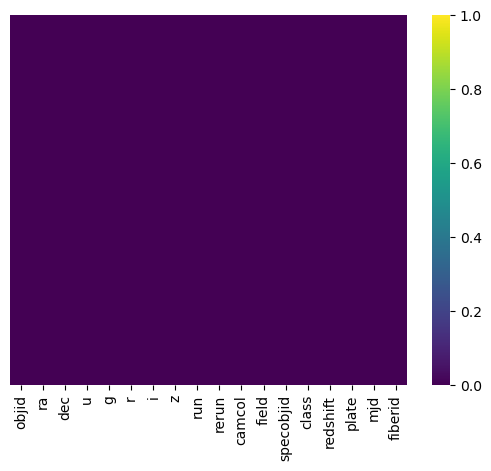

In [13]:
# to illustrate null values using heatmap
sns.heatmap(df.isnull(), yticklabels=False,cmap='viridis')

# Treating Missing values

In [14]:
df['run'].bfill(axis=0, inplace=True)
df['camcol']=df['camcol'].fillna(df['camcol'].mode()[0])
df['rerun'].ffill(axis=0, inplace=True)

In [15]:
# number of null values in each column
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

<Axes: >

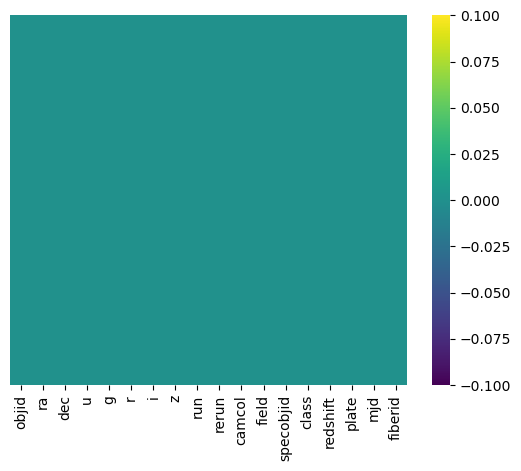

In [16]:
# to illustrate null values using heatmap
sns.heatmap(df.isnull(), yticklabels=False,cmap='viridis')

# Statistical Data

In [17]:
df.mean()
df.median()
df.mode()
df.std()
df.sem()
df.var()
df.quantile()

C:\Users\Diksha\AppData\Local\Temp\ipykernel_10508\2462740087.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()
C:\Users\Diksha\AppData\Local\Temp\ipykernel_10508\2462740087.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()
C:\Users\Diksha\AppData\Local\Temp\ipykernel_10508\2462740087.py:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or 

objid        1.240000e+18
ra           1.803945e+02
dec          4.041660e-01
u            1.885309e+01
g            1.749513e+01
r            1.685877e+01
i            1.655499e+01
z            1.638994e+01
run          7.560000e+02
rerun        3.010000e+02
field        2.990000e+02
specobjid    4.970000e+17
redshift     4.259070e-02
plate        4.410000e+02
mjd          5.199700e+04
fiberid      3.510000e+02
Name: 0.5, dtype: float64

In [18]:
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [19]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run          float64
rerun        float64
camcol        object
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [20]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

# Data Visualization

C:\Users\Diksha\AppData\Local\Temp\ipykernel_10508\4019745504.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


<Axes: >

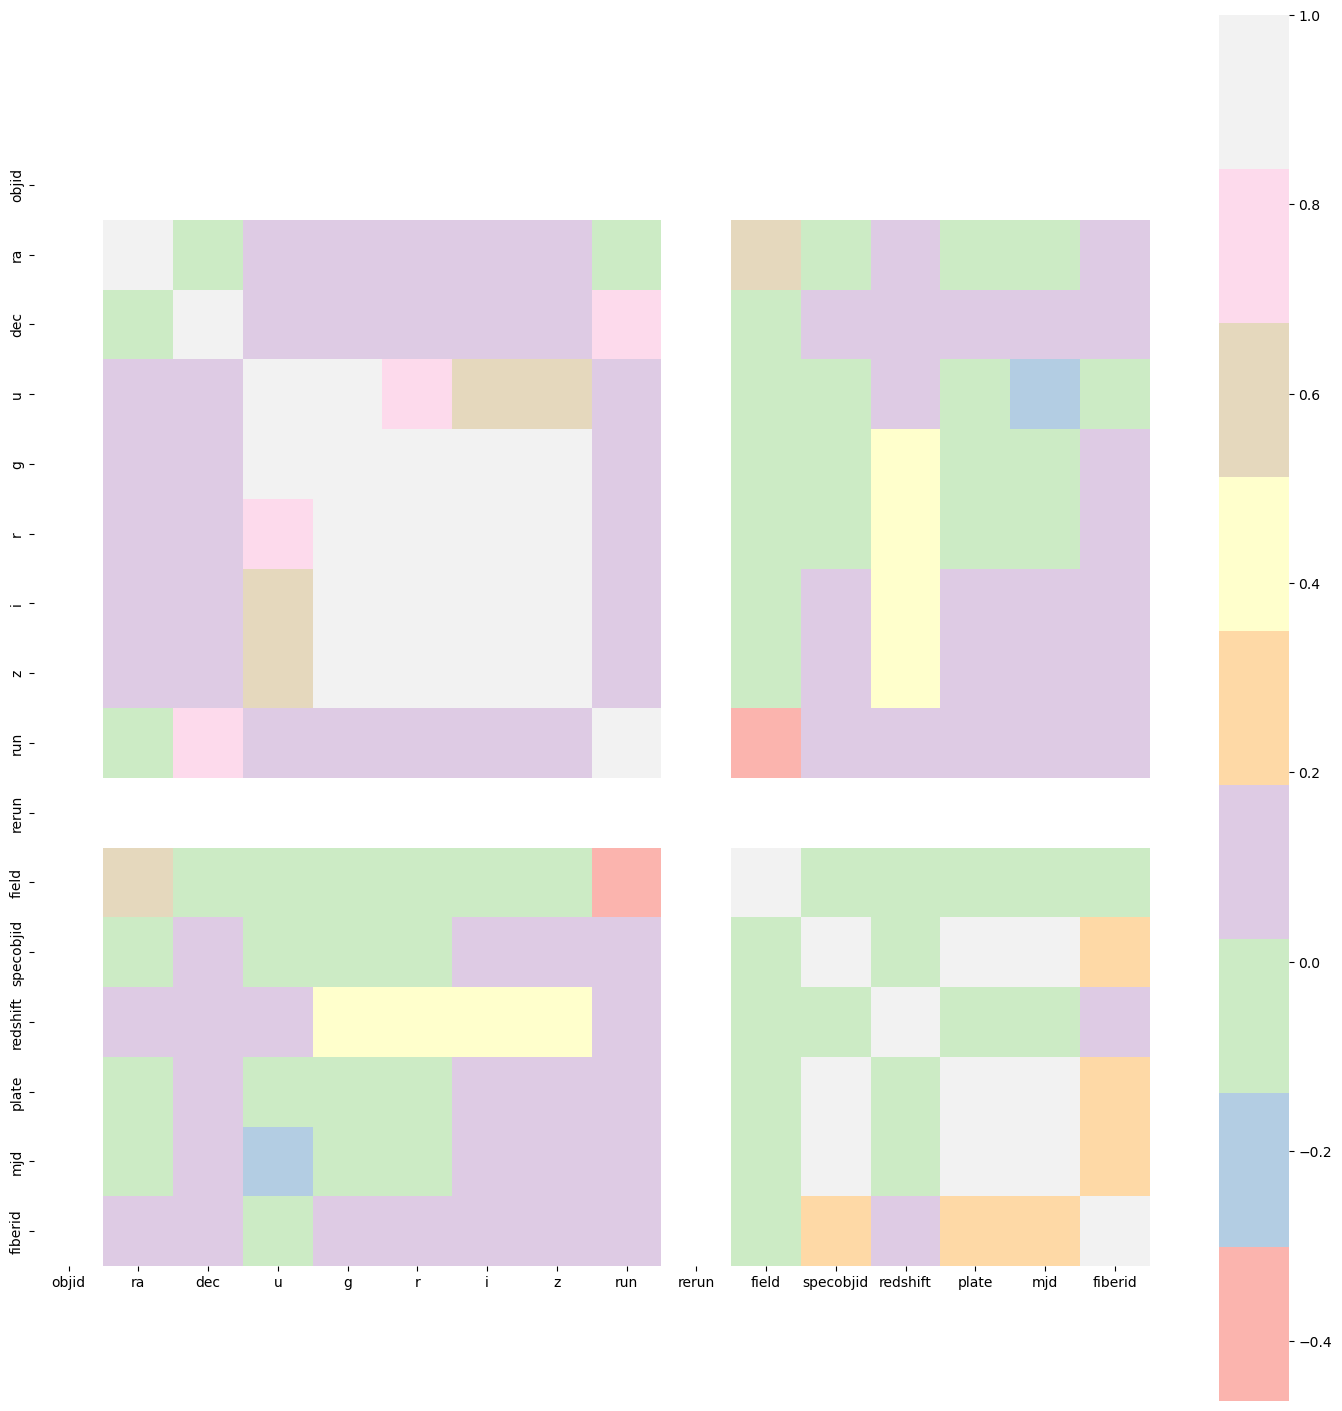

In [21]:
#Examaning a correlation matrix of all the features 
corrmat = df.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Pastel1", square=True)

C:\Users\Diksha\AppData\Local\Temp\ipykernel_10508\755379625.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='GnBu', annot=True)


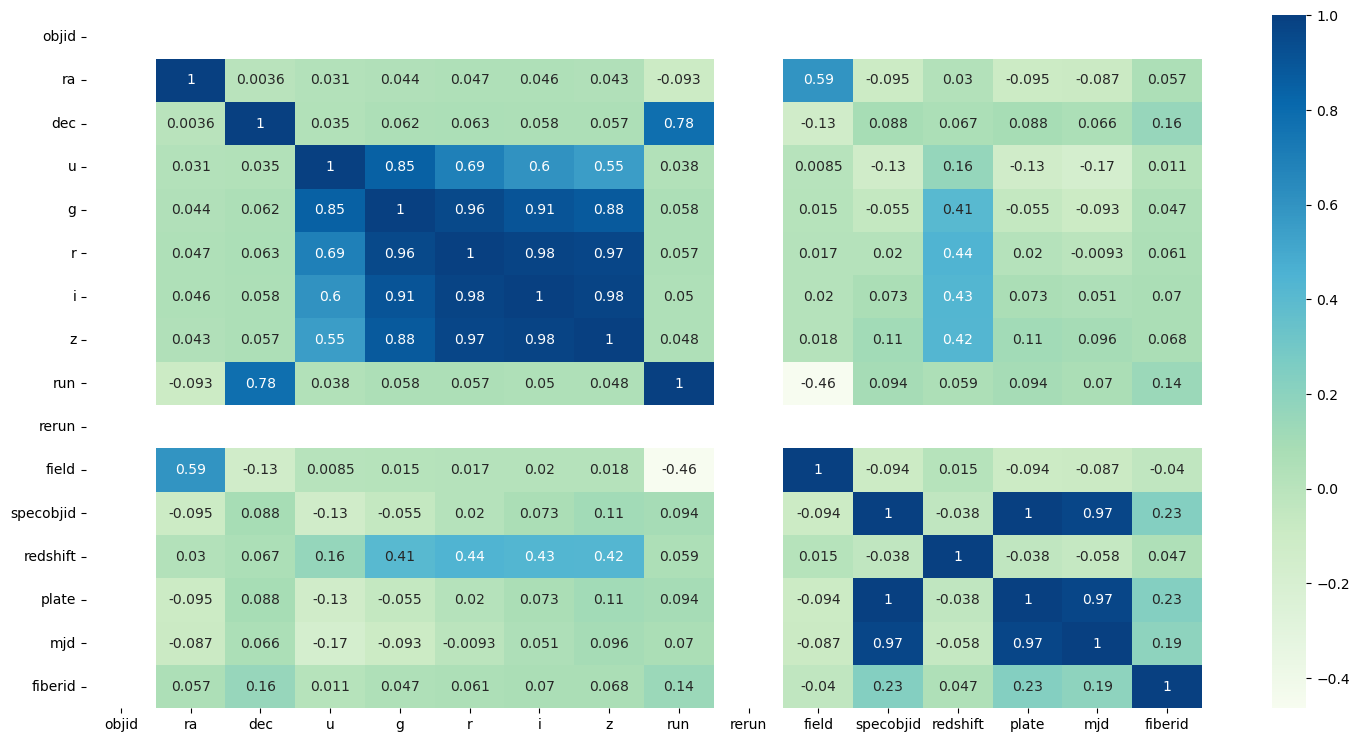

In [22]:
plt.figure(figsize = (18,9))
sns.heatmap(df.corr(), cmap='GnBu', annot=True)
plt.show()

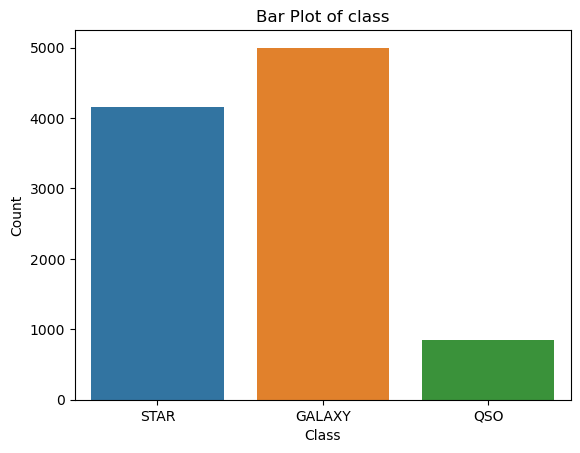

In [23]:
sns.countplot(x='class', data=df)
plt.title('Bar Plot of class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

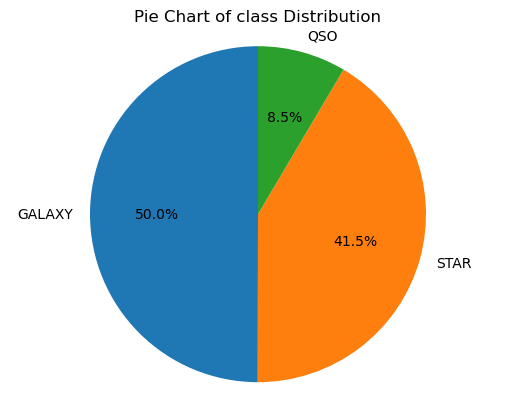

In [24]:
class_counts = df['class'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of class Distribution')
plt.axis('equal')
plt.show()

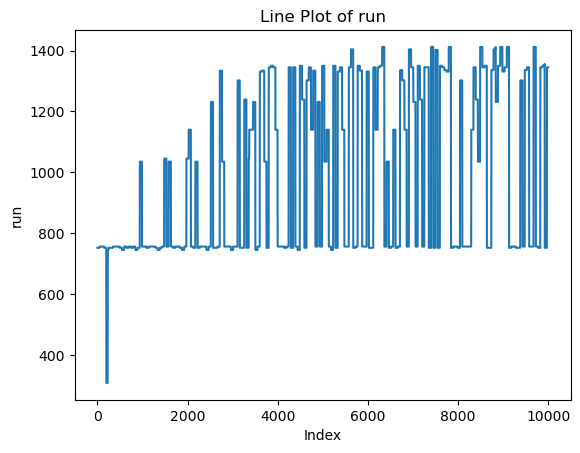

In [25]:
plt.plot(df['run'])
plt.title('Line Plot of run')
plt.xlabel('Index')
plt.ylabel('run')
plt.show()

C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)


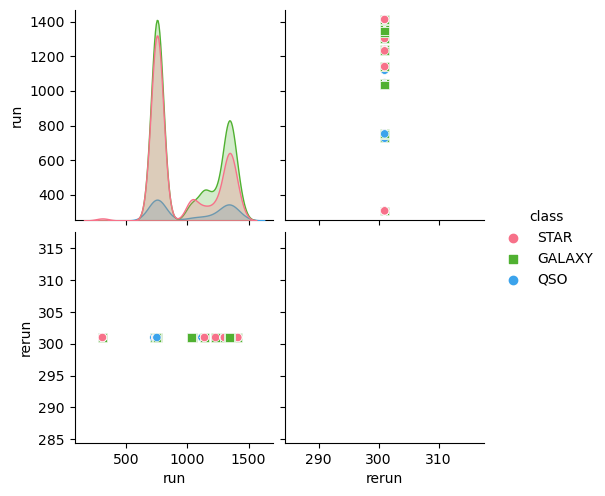

In [26]:
sns.pairplot(df[['run', 'rerun','class']], hue='class', markers=['o', 's'], palette='husl')
plt.show()

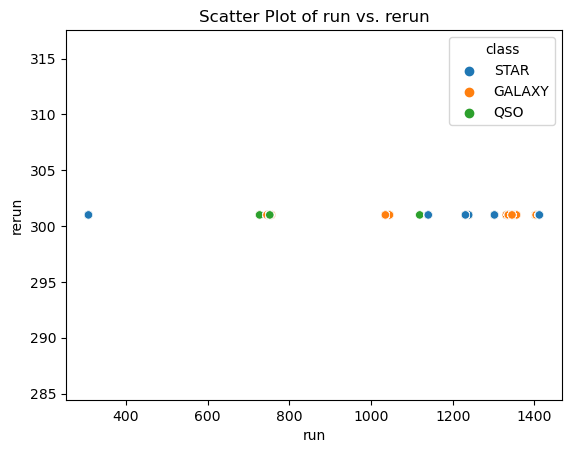

In [27]:
sns.scatterplot(x='run', y= 'rerun', hue='class', data=df)
plt.title('Scatter Plot of run vs. rerun')
plt.xlabel('run')
plt.ylabel('rerun')
plt.show()

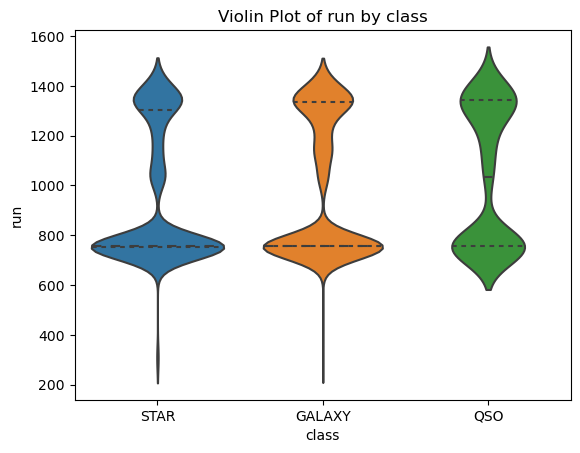

In [28]:
sns.violinplot(x='class', y='run', data=df, inner='quart')
plt.title('Violin Plot of run by class')
plt.xlabel('class')
plt.ylabel('run')
plt.show()

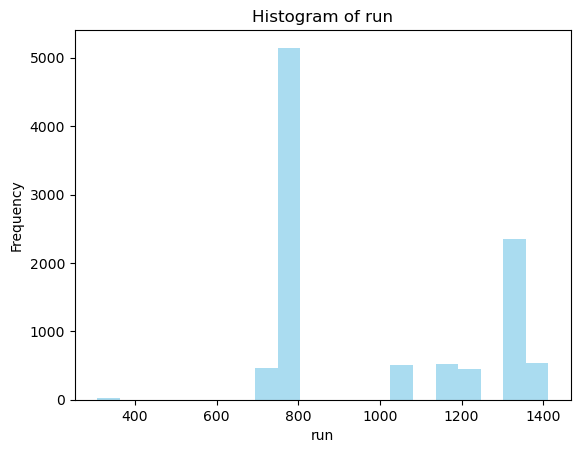

In [29]:
plt.hist(df['run'], bins=20, color='skyblue', alpha=0.7)
plt.title('Histogram of run')
plt.xlabel('run')
plt.ylabel('Frequency')
plt.show()


# Detection of Outliers

In [30]:
from scipy import stats
z_scores = stats.zscore(df['objid'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = df[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
threshold = 3
dno1 = df[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, rerun, camcol, field, specobjid, class, redshift, plate, mjd, fiberid]
Index: []


In [31]:
from scipy import stats
z_scores = stats.zscore(dno1['ra'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = dno1[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
threshold = 3
dno2 = dno1[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, rerun, camcol, field, specobjid, class, redshift, plate, mjd, fiberid]
Index: []


In [32]:
from scipy import stats
z_scores = stats.zscore(dno2['dec'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = dno2[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
threshold = 3
dno3 = dno2[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, rerun, camcol, field, specobjid, class, redshift, plate, mjd, fiberid]
Index: []


In [33]:
from scipy import stats
z_scores = stats.zscore(dno2['u'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = dno2[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
threshold = 3
dno3 = dno2[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, rerun, camcol, field, specobjid, class, redshift, plate, mjd, fiberid]
Index: []


In [34]:
from scipy import stats
z_scores = stats.zscore(dno3['g'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = dno3[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
threshold = 3
dno4 = dno3[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, rerun, camcol, field, specobjid, class, redshift, plate, mjd, fiberid]
Index: []


In [35]:
from scipy import stats
z_scores = stats.zscore(dno4['r'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = dno4[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
threshold = 3
dno5 = dno4[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, rerun, camcol, field, specobjid, class, redshift, plate, mjd, fiberid]
Index: []


In [36]:
from scipy import stats
z_scores = stats.zscore(dno5['i'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = dno5[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
threshold = 3
dno6 = dno5[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, rerun, camcol, field, specobjid, class, redshift, plate, mjd, fiberid]
Index: []


In [37]:
from scipy import stats
z_scores = stats.zscore(dno6['z'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = dno6[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
threshold = 3
dno7= dno6[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, rerun, camcol, field, specobjid, class, redshift, plate, mjd, fiberid]
Index: []


In [38]:
from scipy import stats
z_scores = stats.zscore(dno7['run'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = dno7[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
threshold = 3
dno8 = dno7[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, rerun, camcol, field, specobjid, class, redshift, plate, mjd, fiberid]
Index: []


In [39]:
from scipy import stats
z_scores = stats.zscore(dno8['rerun'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = dno8[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
threshold = 3
dno9= dno8[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, rerun, camcol, field, specobjid, class, redshift, plate, mjd, fiberid]
Index: []


In [40]:
from scipy import stats
z_scores = stats.zscore(dno9['camcol'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = dno9[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
threshold = 3
dno10 = dno9[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, rerun, camcol, field, specobjid, class, redshift, plate, mjd, fiberid]
Index: []


In [41]:
from scipy import stats
z_scores = stats.zscore(dno10['field'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = dno10[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
threshold = 3
dno11 = dno10[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, rerun, camcol, field, specobjid, class, redshift, plate, mjd, fiberid]
Index: []


In [42]:
from scipy import stats
z_scores = stats.zscore(dno11['specobjid'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = dno11[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
threshold = 3
dno12 = dno11[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, rerun, camcol, field, specobjid, class, redshift, plate, mjd, fiberid]
Index: []


In [43]:
from scipy import stats
z_scores = stats.zscore(dno12['redshift'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = dno12[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
threshold = 3
dno13 = dno12[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, rerun, camcol, field, specobjid, class, redshift, plate, mjd, fiberid]
Index: []


In [44]:
from scipy import stats
z_scores = stats.zscore(dno13['plate'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = dno13[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
threshold = 3
dno14 = dno13[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, rerun, camcol, field, specobjid, class, redshift, plate, mjd, fiberid]
Index: []


In [45]:
from scipy import stats
z_scores = stats.zscore(dno14['mjd'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = dno14[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
threshold = 3
dno15 = dno14[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, rerun, camcol, field, specobjid, class, redshift, plate, mjd, fiberid]
Index: []


In [46]:
from scipy import stats
z_scores = stats.zscore(dno15['fiberid'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = dno15[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
threshold = 3
data_no_outliers = dno15[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, rerun, camcol, field, specobjid, class, redshift, plate, mjd, fiberid]
Index: []


In [48]:
df # since there are no outliers

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.240000e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752.0,301.0,4,267,3.720000e+18,STAR,-0.000009,3306,54922,491
1,1.240000e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752.0,301.0,4,267,3.640000e+17,STAR,-0.000055,323,51615,541
2,1.240000e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752.0,301.0,4,268,3.230000e+17,GALAXY,0.123111,287,52023,513
3,1.240000e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752.0,301.0,4,269,3.720000e+18,STAR,-0.000111,3306,54922,510
4,1.240000e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752.0,301.0,4,269,3.720000e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.240000e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345.0,301.0,3,161,5.030000e+17,GALAXY,0.027583,447,51877,246
9996,1.240000e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345.0,301.0,3,162,5.030000e+17,GALAXY,0.117772,447,51877,228
9997,1.240000e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345.0,301.0,3,162,8.220000e+18,STAR,-0.000402,7303,57013,622
9998,1.240000e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345.0,301.0,3,163,5.030000e+17,GALAXY,0.014019,447,51877,229


# SVM

In [49]:
#formation of Model
from sklearn.preprocessing import OneHotEncoder,StandardScaler
categorical_cols=['camcol']
encoder=OneHotEncoder(drop='first',sparse=False)
encoder_cols=pd.DataFrame(encoder.fit_transform(df[categorical_cols]),columns=encoder.get_feature_names_out(categorical_cols))
numerical_cols=['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun',
       'field', 'specobjid', 'redshift', 'plate', 'mjd', 'fiberid']
scaler=StandardScaler()
scaled_cols=pd.DataFrame(scaler.fit_transform(df[numerical_cols]),columns=scaler.get_feature_names_out(numerical_cols))

C:\Users\Diksha\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [50]:
df['class'] = df['class'].map({'GALAXY':0, 'STAR':1, 'QSO' :2 })

In [51]:
#X&Y
X=pd.concat([encoder_cols,scaled_cols],axis=1)
Y=df['class']

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import roc_curve,auc

In [53]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

In [54]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [55]:
svcm= SVC(kernel='linear')

In [56]:
svcm.fit(X_train,Y_train)

SVC(kernel='linear')

In [57]:
y_pred = svcm.predict(X_test)

In [58]:
acc=accuracy_score(Y_test,y_pred)
print('Accuracy:',acc)

Accuracy: 0.9695


In [59]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       996
           1       0.94      0.99      0.97       814
           2       0.99      0.97      0.98       190

    accuracy                           0.97      2000
   macro avg       0.98      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



Confusion Matrix:  [[947  48   1]
 [  6 808   0]
 [  6   0 184]]


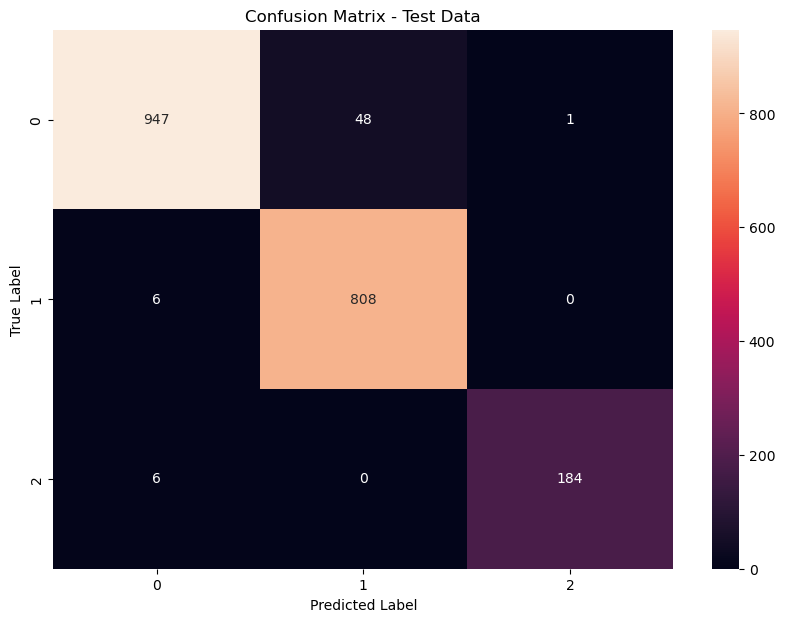

In [60]:
cm = confusion_matrix(Y_test,y_pred)
print('Confusion Matrix: ',cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

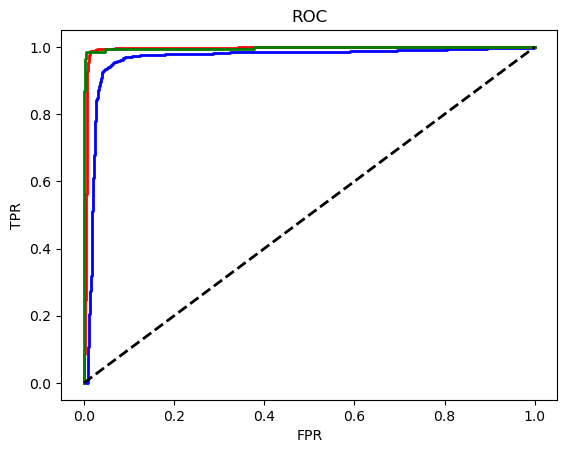

In [66]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
df['class'] = df['class'].map({'GALAXY':0, 'STAR':1, 'QSO' :2 })
yb= label_binarize(Y, classes=[0,1,2])
nc= yb.shape[1]
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))
y_score = classifier.fit(X_train, Y_train).decision_function(X_test)
fpr=dict()
tpr=dict()
roc_auc = dict()
for i in range(nc):
    fpr[i], tpr[i], _ = roc_curve(Y_test ==i, y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()
color = ['blue','red','green']
for i, color in zip(range(nc),color):
    plt.plot (fpr[i], tpr[i], color=color, lw=2,
             label='ROC(area= {: .2f}) for class{}'.format(roc_auc[i],df['class'][i]))
plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

# Tuning for SVM model

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

# GridSearchCV

In [63]:
param_grid = {
    'C': [0.1, 1, 10],            # Regularization parameter
    'kernel': ['linear', 'rbf','poly','sigmoid'],  # Kernel type
      
}


In [64]:
grid = GridSearchCV(estimator = svcm, param_grid=param_grid, cv = 5)

In [65]:
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [67]:
best_parameter = grid.best_params_
best_model = grid.best_estimator_
print('hyperparameters: ',best_parameter)

hyperparameters:  {'C': 10, 'kernel': 'linear'}


In [68]:
y_pred = best_model.predict(X_test)

In [69]:
acc=accuracy_score(Y_test,y_pred)
print("Accuracy:",acc)

Accuracy: 0.979


In [70]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       996
           1       0.96      1.00      0.98       814
           2       0.99      0.97      0.98       190

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



Confusion Matrix:  [[960  35   1]
 [  0 814   0]
 [  6   0 184]]


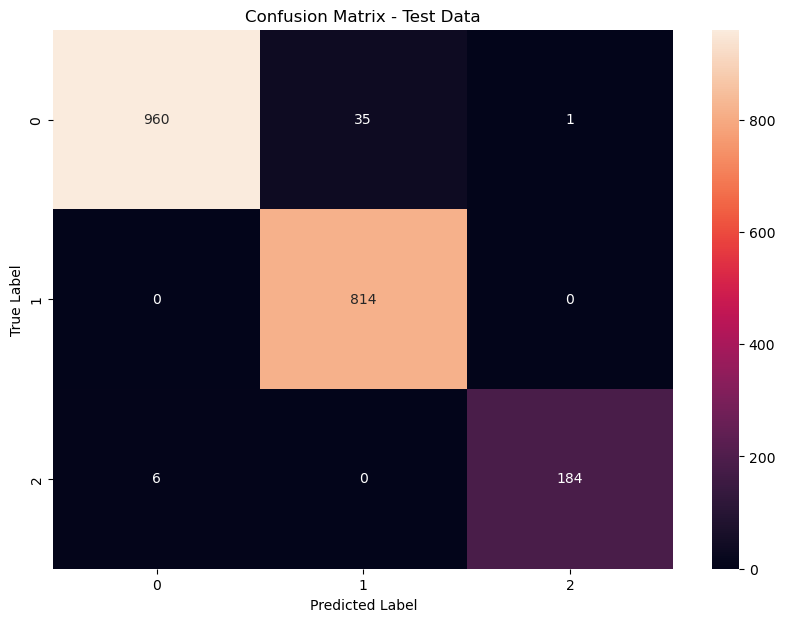

In [69]:
cm = confusion_matrix(Y_test,y_pred)
print('Confusion Matrix: ',cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# RandomizedSearchCV

In [72]:
param_grid = {
    'C': [0.1, 1, 10],            # Regularization parameter
    'kernel': ['linear', 'rbf','poly','sigmoid'],  # Kernel type
      
}
random=RandomizedSearchCV(svcm, param_grid, cv=5)

In [73]:
random.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=SVC(kernel='linear'),
                   param_distributions={'C': [0.1, 1, 10],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']})

In [74]:
best_parameters = random.best_params_
best_model = random.best_estimator_
print('Hyperparameters:',best_parameters)

Hyperparameters: {'kernel': 'linear', 'C': 1}


In [75]:
y_pred = best_model.predict(X_test)

In [76]:
acc=accuracy_score(Y_test,y_pred)
print("Accuracy:",acc)

Accuracy: 0.9695


In [77]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       996
           1       0.94      0.99      0.97       814
           2       0.99      0.97      0.98       190

    accuracy                           0.97      2000
   macro avg       0.98      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



Confusion Matrix:  [[947  48   1]
 [  6 808   0]
 [  6   0 184]]


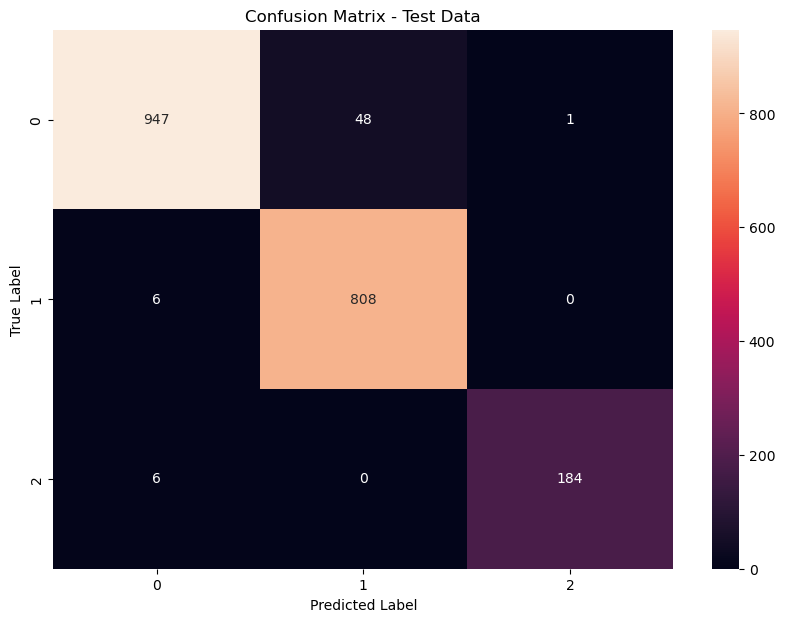

In [78]:
cm = confusion_matrix(Y_test,y_pred)
print('Confusion Matrix: ',cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Naive Bayes

In [79]:
 from sklearn import model_selection, naive_bayes, metrics,feature_extraction

In [80]:
x=scaled_cols



In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.25,random_state=42)

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [83]:
bayes = naive_bayes.MultinomialNB()

In [84]:
bayes.fit(x_train,y_train)

MultinomialNB()

In [85]:
y_pred_nb=bayes.predict(x_test)

In [86]:
accuracy=metrics.accuracy_score(y_test,y_pred_nb)
accuracy

0.782

In [87]:
 print(metrics.classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83      1246
           1       0.91      0.73      0.81      1012
           2       1.00      0.01      0.02       242

    accuracy                           0.78      2500
   macro avg       0.88      0.57      0.55      2500
weighted avg       0.82      0.78      0.74      2500



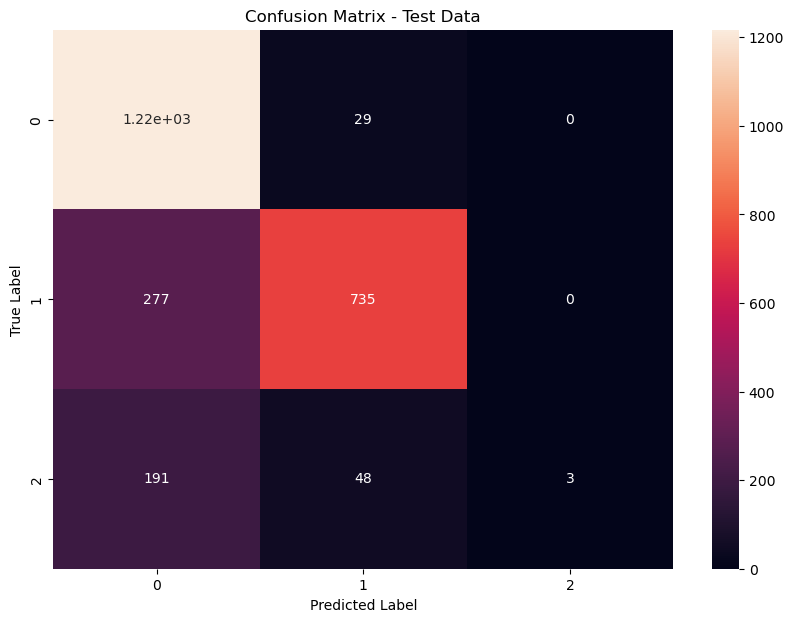

In [88]:
cm=confusion_matrix(y_test,y_pred_nb)
cm
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

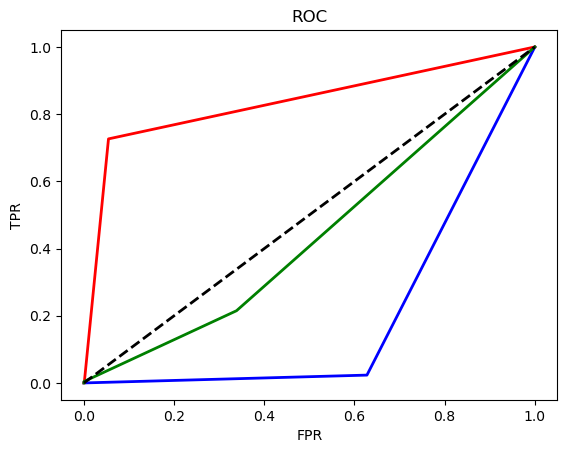

In [89]:
yb=label_binarize(Y, classes=[0,1,2])
nc = yb.shape[1] 
classifier = OneVsRestClassifier(bayes)
y_score=classifier.fit(x_train,y_train).predict(x_test)
fpr=dict()
tpr=dict()
roc_auc=dict()

for i in range (nc):
    fpr[i],tpr[i],_=roc_curve(y_test == i, y_score)
    roc_auc[i]=auc(fpr[i],tpr[i])
plt.figure()
color=['blue','red','green']
for i, color in zip(range(nc),color):
    plt.plot(fpr[i],tpr[i],color=color, lw=2, label='ROC (area={:.2f}) for class {}'.format(roc_auc[i],df['class'][i]))
plt.plot([0,1],[0,1],'k--',lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

# Tuning for Naive Bayes Model

# GridSearchCV

In [90]:
 param_grid = {
'alpha': [0.1, 1, 10, 100],
'fit_prior': [True, False]
}


In [91]:
bayes = naive_bayes.MultinomialNB()
grid_search = GridSearchCV(bayes, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 1, 10, 100],
                         'fit_prior': [True, False]})

In [92]:
best_param = grid_search.best_params_
best_nb = naive_bayes.MultinomialNB(alpha = best_param['alpha'], fit_prior = best_param['fit_prior'])
best_nb.fit(x_train, y_train)
y_pred = best_nb.predict(x_test)

In [93]:
print("Best Hyperparameter : ", best_param)

Best Hyperparameter :  {'alpha': 0.1, 'fit_prior': False}


In [94]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy',acc)

Accuracy 0.8548


In [95]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      1246
           1       0.94      0.73      0.82      1012
           2       0.99      0.76      0.86       242

    accuracy                           0.85      2500
   macro avg       0.91      0.82      0.85      2500
weighted avg       0.87      0.85      0.85      2500



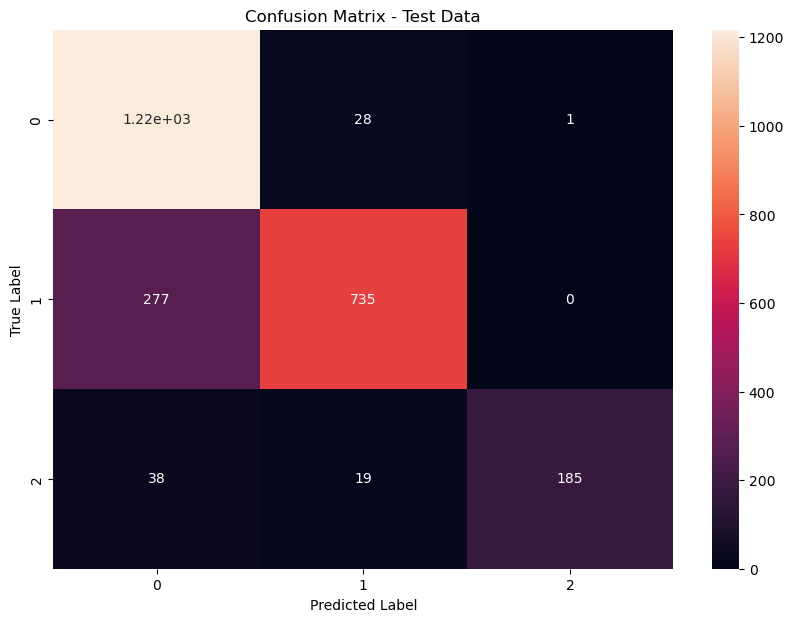

In [96]:
cm=confusion_matrix(y_test,y_pred)
cm
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# RandomizedSearchCV

In [97]:
#Randomized Search 
from scipy.stats import uniform
param_dist = {
    'alpha': uniform(0.1, 2.0),  # Example: Uniform distribution for alpha
    'fit_prior':[True,False]
}

In [98]:
 bayes = naive_bayes.MultinomialNB()

In [99]:
x=scaler.fit_transform(x)

In [100]:
from sklearn.utils.validation import check_non_negative
check_non_negative(x, "MultinomialNB (input x)")

In [101]:
randomized_search = RandomizedSearchCV(bayes, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5)
randomized_search.fit(x, Y)  # X is your input data, y is your target labels

RandomizedSearchCV(cv=5, estimator=MultinomialNB(),
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000020529F5F750>,
                                        'fit_prior': [True, False]},
                   scoring='accuracy')

In [102]:
best_param = randomized_search.best_params_
print("Best Hyperparameter : ", best_param)

Best Hyperparameter :  {'alpha': 0.4814222986266413, 'fit_prior': False}


In [103]:
best_nb = naive_bayes.MultinomialNB(alpha = best_param['alpha'], fit_prior = best_param['fit_prior'])
best_nb.fit(x_train, y_train)
y_pred = best_nb.predict(x_test)

In [104]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy',acc)

Accuracy 0.8528


In [105]:
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      1246
           1       0.94      0.73      0.82      1012
           2       0.99      0.74      0.85       242

    accuracy                           0.85      2500
   macro avg       0.91      0.82      0.85      2500
weighted avg       0.87      0.85      0.85      2500



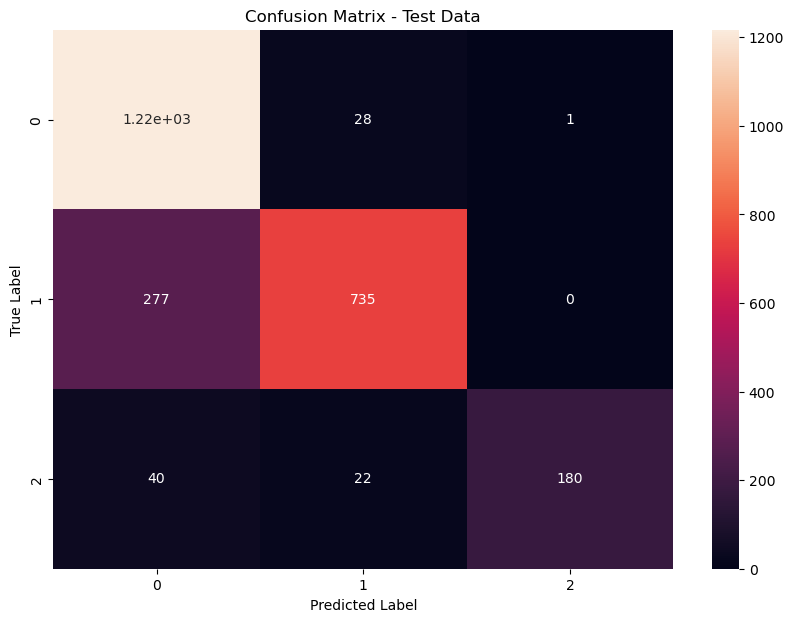

In [106]:
cm=confusion_matrix(y_test,y_pred)
cm
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()